
# Задание к лекции 04-1: Линейная регрессия 1

Name:

Email:




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [16]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import probplot


# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [2]:
df0 = pd.DataFrame({'dose':0, 'food_consump':food_consump_dose0})
df2p5 = pd.DataFrame({'dose':2.5, 'food_consump':food_consump_dose2p5})
df5 = pd.DataFrame({'dose':5, 'food_consump':food_consump_dose5})

## Создание графика

In [3]:
df = pd.concat([df0, df2p5, df5])

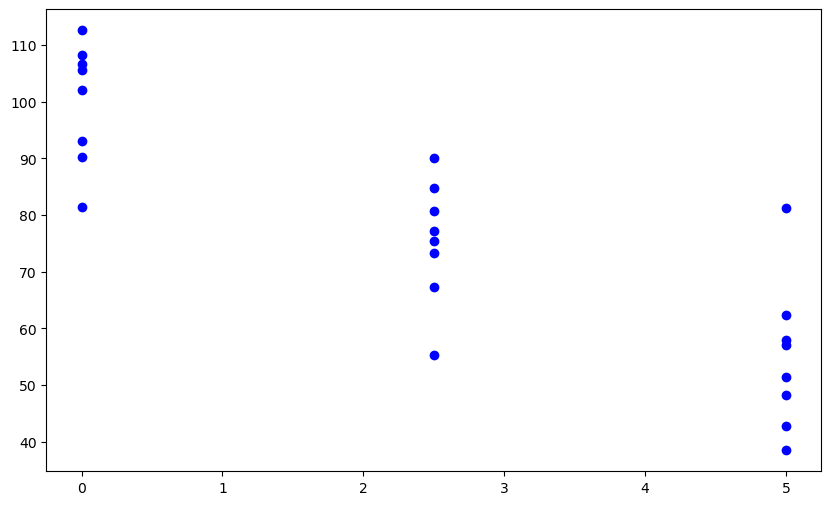

In [4]:
plt.scatter(x=df['dose'], y= df['food_consump'], c ="blue")
plt.show()

<BarContainer object of 24 artists>

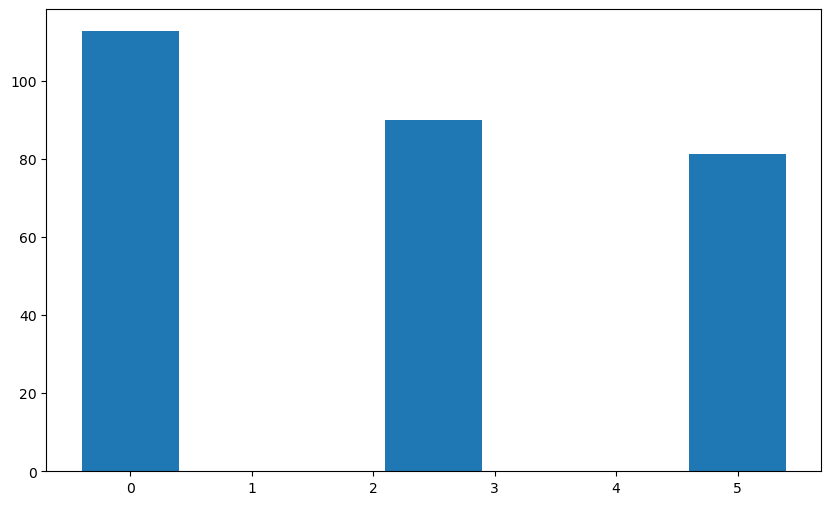

In [5]:
plt.bar(df['dose'],df['food_consump'])

## Запуск линейной регрессии

Создание линейной регрессии (потребление = b1+b2*дозу) и вывод статистических характеристик модели

In [6]:
amf = sm.ols(formula="food_consump ~ dose", data=df).fit()

In [10]:
r2 = amf.rsquared
coef = amf.params
p = amf.pvalues
print(f'R2 = {r2},\np-value const = {p[0]}, p-value Доза = {p[1]},\nПотребление пищи = {coef[0]} + {coef[1]}*Доза')

R2 = 0.7393816482704202,
p-value const = 2.336289954606111e-18, p-value Доза = 7.265040872435079e-08,
Потребление пищи = 99.33125000000004 + -9.007500000000004*Доза


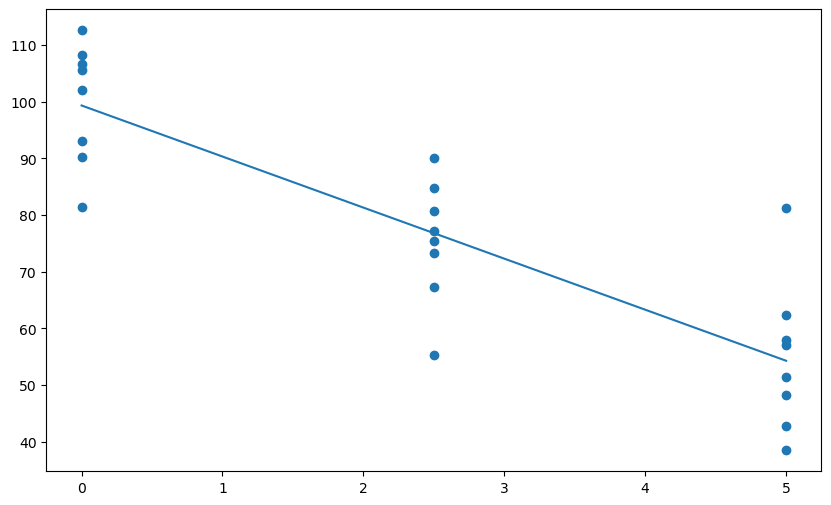

In [8]:
plt.scatter(x=df['dose'], y= df['food_consump'])
plt.plot(df['dose'],amf.predict())
plt.show()

Переменные имеют хорошую связь, доля дисперсии равна 73%, p-value< 0.05, 

на графике чётко видна линия тренда потребляемой пищи, которая идёт на спад при увеличении дозы

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



Вывод суммы квадратов остатков

In [9]:
# ваш код
amf.ssr

2859.860625

Создание столбца с прогнозом по формуле $$ Потребление = 99.33125000000004 + -9.007500000000004*Доза $$ и столбца с остатками по формуле $$ Потребление - прогноз $$

In [18]:
df['pred'] = (coef[0] + coef[1]*df['dose'])
df['ost'] = df['food_consump']-df['pred']
df.head(5)

,dose,food_consump,pred,ost
0,0.0,112.6,99.33125,13.26875
1,0.0,102.1,99.33125,2.76875
2,0.0,90.2,99.33125,-9.13125
3,0.0,81.5,99.33125,-17.83125
4,0.0,105.6,99.33125,6.26875


**Ваш ответ:**


(array([2., 1., 3., 4., 2., 6., 3., 2., 0., 1.]),
 array([-21.5125  , -16.660625, -11.80875 ,  -6.956875,  -2.105   ,
          2.746875,   7.59875 ,  12.450625,  17.3025  ,  22.154375,
         27.00625 ]),
 <BarContainer object of 10 artists>)

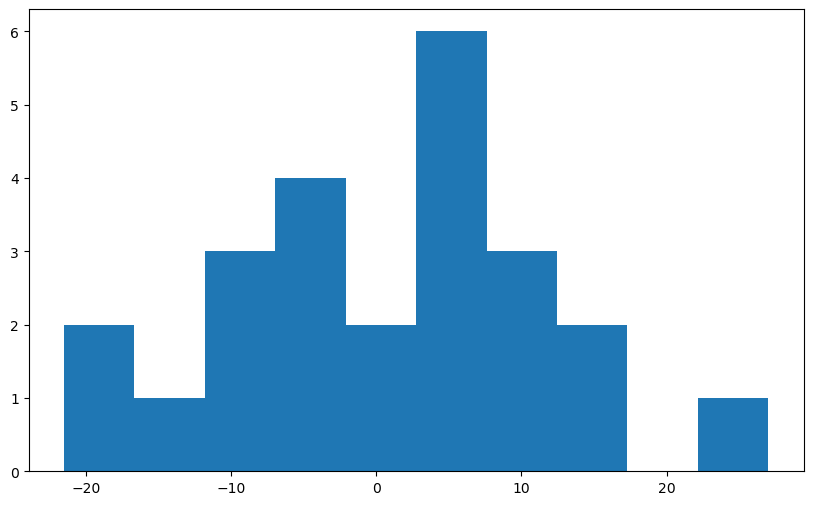

In [15]:
plt.hist(df['ost'])

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([-21.5125 , -17.83125, -15.79375, -11.59375,  -9.5125 ,  -9.13125,
          -6.33125,  -5.99375,  -3.5125 ,  -2.79375,  -1.3125 ,   0.2875 ,
           2.76875,   2.80625,   3.60625,   3.8875 ,   6.26875,   7.26875,
           7.9875 ,   8.00625,   8.96875,  13.1875 ,  13.26875,  27.00625])),
 (11.532225455128602, -3.211856760362207e-14, 0.9881540082408565))

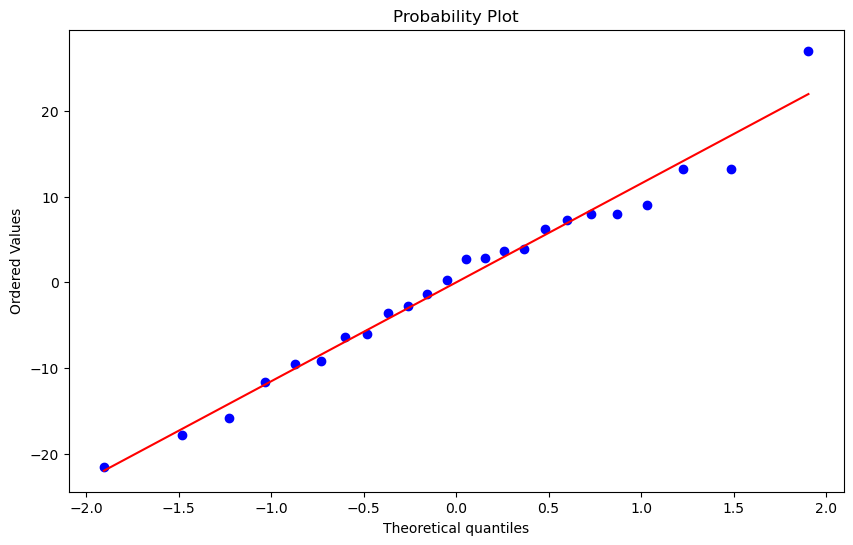

In [17]:
probplot(df['ost'], plot=plt)

По первому графику можно сказать, что данные распределены нормально. По второму графику можно сделать вывод, что данные имеют нормальное распределение с хвостовыми значениями.